In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer


## Lecture des données

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Tdjaaleb/MALIA/main/Time%20Series/Preprocessing/Data/clean_National.csv", sep=";")

train = df[:52561]
val = df[52561:70081]
covid = df[70081:105216]
test = df[105216:]

#### Données train

In [3]:
train = train.dropna()
Y_train = train["Conso"]
X_train = train.drop(["Conso","Date","Heure","ConsoT-1"], axis=1)

#### Données test

In [4]:
Y_test = test["Conso"]
X_test = test.drop(["Conso","Date","Heure","ConsoT-1"], axis=1)

## GridSearchCV

In [5]:
params = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1]
    }

In [6]:
def rmse(true, pred):
    return math.sqrt(mean_squared_error(true, pred))
    
scorer = make_scorer(rmse, greater_is_better=False)

In [7]:
model = GradientBoostingRegressor()
gscv = GridSearchCV(model, params, cv=3, scoring=scorer)
gscv.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 10],
                         'n_estimators': [100, 500, 1000]},
             scoring=make_scorer(rmse, greater_is_better=False))

In [8]:
GSCV_results = pd.DataFrame({"learning rate" : gscv.cv_results_['param_learning_rate'],
                             "max_depth" : gscv.cv_results_['param_max_depth'],
                             "n estimators" : gscv.cv_results_['param_n_estimators'],
                             "mean test score" : gscv.cv_results_["mean_test_score"]})
print(GSCV_results.sort_values(by="mean test score"))

   learning rate max_depth n estimators  mean test score
0           0.01         3          100     -5668.071426
3           0.01         5          100     -5261.716191
6           0.01        10          100     -5042.563135
1           0.01         3          500     -2796.135987
14           0.1         5         1000     -2686.336995
17           0.1        10         1000     -2672.605616
16           0.1        10          500     -2665.642464
15           0.1        10          100     -2638.606499
13           0.1         5          500     -2628.748687
8           0.01        10         1000     -2619.955363
11           0.1         3         1000     -2608.439297
2           0.01         3         1000     -2603.008227
7           0.01        10          500     -2590.695624
9            0.1         3          100     -2590.628150
4           0.01         5          500     -2572.593779
12           0.1         5          100     -2535.952211
10           0.1         3     

## Création du modèle

In [9]:
model = GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=1000)
model.fit(X_train, Y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=1000)

#### Prédiction et RMSE

In [10]:
pred = model.predict(X_test)
print("RMSE : ", rmse(Y_test, pred))

RMSE :  2167.2251646113623


#### Visualisation des trois premières semaines de 2022

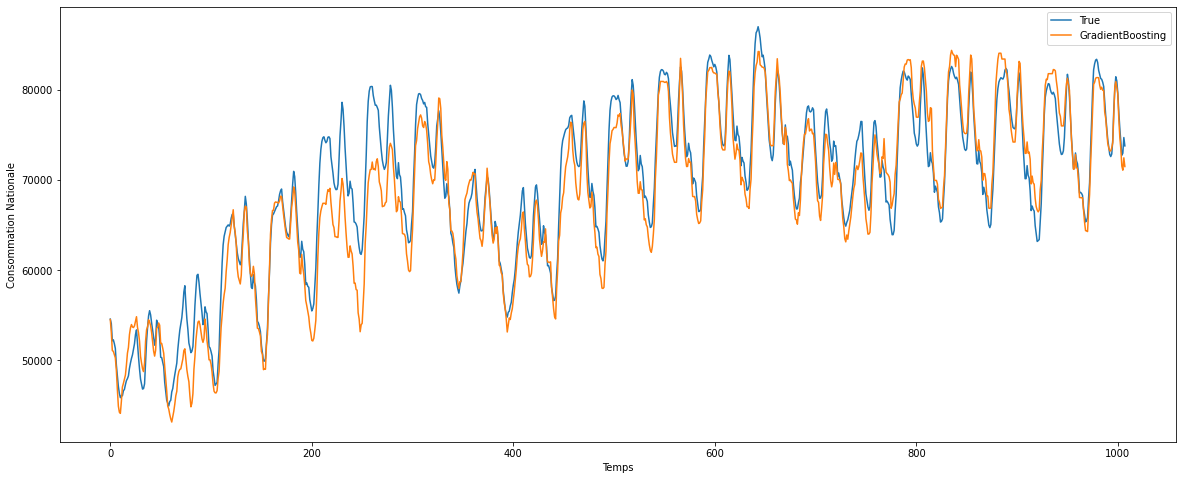

In [14]:
plt.figure(figsize=(20,8))
plt.plot(Y_test.reset_index()["Conso"][0:1008])
plt.plot(pred[0:1008])
plt.xlabel("Temps")
plt.ylabel("Consommation Nationale")
plt.legend(["True", "GradientBoosting"])
plt.show()